In [2]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time

In [3]:
X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8 ],
              [8, 8],
              [1, 0.6],
              [9,11]])

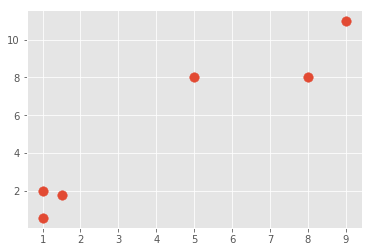

In [4]:
plt.scatter(X[:,0], X[:,1], s=90)
plt.show()

In [5]:
colors = 10*["g","r","c","b","k"]

In [6]:
f= [1,2,3,0]
v=f.index(min(f))
print(v)

3


In [7]:
class K_Means:
    fig = plt.figure()
    ax1 = fig.add_subplot(1,1,1)
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
        
            
    def fit(self,data):
        #centroid dict
        self.centroids = {}
        # since k=2 we will select first two points from the data and we will declare that as a centroid
        
        self.track={}
        for i in range(self.k):
            self.track[i]=[]
        
        for i in range(self.k):
            self.centroids[i] = data[i]
            self.track[i].append(data[i])
            
        # we will run this loop for 300 times (300 iteration)
        for i in range(self.max_iter):
            self.classifications = {}  #{0: [], 1: []}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:  #finding distance from centroid , finding mini value , putting them in classification
                distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in 
                                                                                    self.centroids]
                classification = distances.index(min(distances)) #find the index of the min distance

                self.classifications[classification].append(featureset)
    

            prev_centroids = dict(self.centroids)
                            
            for classification in self.classifications:

                self.centroids[classification] = np.average(self.classifications[classification],axis=0)
                self.track[classification].append(np.average(self.classifications[classification],axis=0))
                #print(self.centroids)
            optimized = True
            '''def animate(i):
                xar = centroids[centroid][0]
                yar = centroids[centroid][1]
                ax1.clear()
                ax1.plot(xar,yar)
             '''   
            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    optimized = False
            
            #ani = animation.FuncAnimation(self.fig, animate, interval=1000)
            #plt.show()
            
            if optimized:
                break
                
            
    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification


In [8]:
clf = K_Means()
clf.fit(X)

In [9]:
print(clf.track)

{0: [array([ 1.,  2.]), array([ 1.,  2.]), array([ 1.16666667,  1.46666667]), array([ 1.16666667,  1.46666667])], 1: [array([ 1.5,  1.8]), array([ 4.9 ,  5.88]), array([ 7.33333333,  9.        ]), array([ 7.33333333,  9.        ])]}


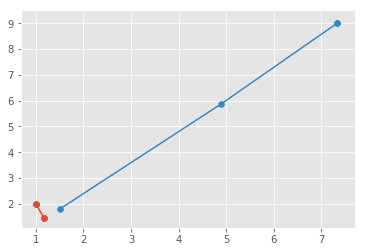

In [10]:
for i in range(clf.k):
    x,y=[],[]
    for j in range(len(clf.track[i])):
        x.append(clf.track[i][j][0])
        y.append(clf.track[i][j][1])
    plt.plot(x,y)
    plt.scatter(x,y)
plt.show()

In [11]:
for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="o", color="k", s=50, linewidths=1)

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=50, linewidths=1)


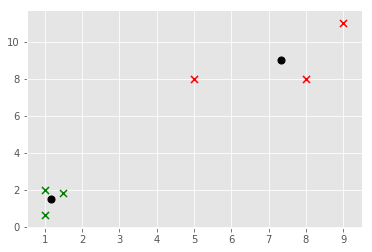

In [12]:
plt.show()

In [13]:
clf.predict([2,2])

0

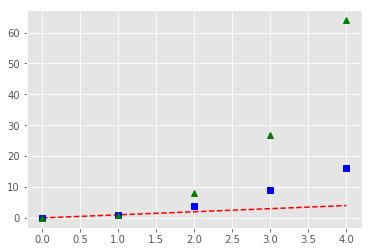

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 1)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

Traceback (most recent call last):
  File "/home/mihir/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 388, in process
    proxy(*args, **kwargs)
  File "/home/mihir/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 228, in __call__
    return mtd(*args, **kwargs)
  File "/home/mihir/anaconda3/lib/python3.6/site-packages/matplotlib/animation.py", line 1026, in _start
    self._init_draw()
  File "/home/mihir/anaconda3/lib/python3.6/site-packages/matplotlib/animation.py", line 1750, in _init_draw
    self._draw_frame(next(self.new_frame_seq()))
  File "/home/mihir/anaconda3/lib/python3.6/site-packages/matplotlib/animation.py", line 1772, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
  File "<ipython-input-15-5ec9ff5085a6>", line 9, in animate
    pullData = open("sampleText.txt","r").read()
FileNotFoundError: [Errno 2] No such file or directory: 'sampleText.txt'


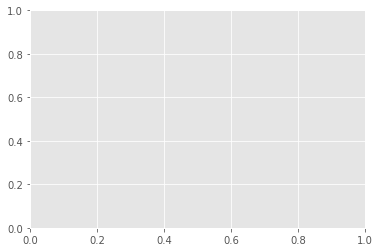

In [15]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

def animate(i):
    pullData = open("sampleText.txt","r").read()
    dataArray = pullData.split('\n')
    xar = []
    yar = []
    for eachLine in dataArray:
        if len(eachLine)>1:
            x,y = eachLine.split(',')
            xar.append(int(x))
            yar.append(int(y))
    ax1.clear()
    ax1.plot(xar,yar)
ani = animation.FuncAnimation(fig, animate, interval=1000)
plt.show()